# Scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

In [3]:
iris = pd.read_csv("Iris.csv")
print(iris.dtypes)

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object


### 1. Data Split
The fitted scaler from a train set will be applied to the test set.<br>
Note that the splited data are pandas dataframes and the scaled data are numpy arrays.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris["Species"],
                                                    test_size=0.3, random_state=96)
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (105, 4) (105,)
Test: (45, 4) (45,)


### 2.1. Standard Scaler
Using mean and variance of each feature. Behave badly if not normally distributed or with outliers.

In [5]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [6]:
## Mean of Train Set
print(round(pd.DataFrame({"Initial":X_train.mean(axis=0),
                          "Scaled":X_train_standard.mean(axis=0)}), 3))

              Initial  Scaled
Sepal_Length    5.908     0.0
Sepal_Width     3.010    -0.0
Petal_Length    3.952    -0.0
Petal_Width     1.258     0.0


In [7]:
## Standard Deviation of Train Set
print(round(pd.DataFrame({"Initial":X_train.std(axis=0),
                          "Scaled":X_train_standard.std(axis=0)}), 3))

              Initial  Scaled
Sepal_Length    0.832     1.0
Sepal_Width     0.396     1.0
Petal_Length    1.706     1.0
Petal_Width     0.742     1.0


In [8]:
## Mean of Test Set
print(round(pd.DataFrame({"Initial":X_test.mean(axis=0),
                          "Scaled":X_test_standard.mean(axis=0)}), 3))

              Initial  Scaled
Sepal_Length    5.693  -0.259
Sepal_Width     3.156   0.368
Petal_Length    3.307  -0.380
Petal_Width     1.060  -0.268


In [9]:
## Standard Deviation of Test Set
print(round(pd.DataFrame({"Initial":X_test.std(axis=0),
                          "Scaled":X_test_standard.std(axis=0)}), 3))

              Initial  Scaled
Sepal_Length    0.808   0.964
Sepal_Width     0.501   1.256
Petal_Length    1.834   1.068
Petal_Width     0.802   1.073


### 2.2. Robust Scaler
Using median and quantiles of each feature. Robust to outliers.

In [10]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_robust = robust_scaler.transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

In [11]:
## Median of Train Set
print(round(pd.DataFrame({"Initial":X_train.median(axis=0),
                          "Scaled":np.median(X_train_robust, axis=0)}), 3))

              Initial  Scaled
Sepal_Length      5.9     0.0
Sepal_Width       3.0     0.0
Petal_Length      4.5     0.0
Petal_Width       1.4     0.0


In [12]:
## Median of Test Set
print(round(pd.DataFrame({"Initial":X_test.median(axis=0),
                          "Scaled":np.median(X_test_robust, axis=0)}), 3))

              Initial  Scaled
Sepal_Length      5.5  -0.286
Sepal_Width       3.1   0.250
Petal_Length      3.6  -0.265
Petal_Width       1.1  -0.200


### 2.3. Min Max Scaler
Using minimum and maximum of each feature. Each feature gets [0, 1] values.

In [13]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [14]:
## Minimum of Train Set
print(round(pd.DataFrame({"Initial":X_train.min(axis=0),
                          "Scaled":X_train_minmax.min(axis=0)}), 3))

              Initial  Scaled
Sepal_Length      4.4     0.0
Sepal_Width       2.0     0.0
Petal_Length      1.0     0.0
Petal_Width       0.1     0.0


In [15]:
## Maximum of Train Set
print(round(pd.DataFrame({"Initial":X_train.max(axis=0),
                          "Scaled":X_train_minmax.max(axis=0)}), 3))

              Initial  Scaled
Sepal_Length      7.9     1.0
Sepal_Width       4.0     1.0
Petal_Length      6.9     1.0
Petal_Width       2.5     1.0


In [16]:
## Minimum of Test Set
print(round(pd.DataFrame({"Initial":X_test.min(axis=0),
                          "Scaled":X_test_minmax.min(axis=0)}), 3))

              Initial  Scaled
Sepal_Length      4.3  -0.029
Sepal_Width       2.3   0.150
Petal_Length      1.1   0.017
Petal_Width       0.1   0.000


In [17]:
## Maximum of Test Set
print(round(pd.DataFrame({"Initial":X_test.max(axis=0),
                          "Scaled":X_test_minmax.max(axis=0)}), 3))

              Initial  Scaled
Sepal_Length      7.7   0.943
Sepal_Width       4.4   1.200
Petal_Length      6.7   0.966
Petal_Width       2.5   1.000


### 2.4. Normalizer
Using vector of each instance. Each vector to have an unit norm.
Importance of direction rather than length.

In [18]:
normalizer = Normalizer(norm="l2")
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [19]:
## Norm of the First Instance in Train Set
print(pd.DataFrame({"Initial":[X_train.iloc[0, :].values, sum(X_train.iloc[0, :]**2)**0.5],
                    "Scaled":[np.round(X_train_norm[0], 3), sum(X_train_norm[0]**2)**0.5]},
                   index=["Instance", "Norm"]))

                       Initial                        Scaled
Instance  [6.0, 3.0, 4.8, 1.8]  [0.711, 0.355, 0.569, 0.213]
Norm                   8.44275                             1


In [20]:
## Norm of the First Instance in Test Set
print(pd.DataFrame({"Initial":[X_test.iloc[0, :].values, sum(X_test.iloc[0, :]**2)**0.5],
                    "Scaled":[np.round(X_test_norm[0], 3), sum(X_test_norm[0]**2)**0.5]},
                   index=["Instance", "Norm"]))

                       Initial                        Scaled
Instance  [4.8, 3.1, 1.6, 0.2]  [0.808, 0.522, 0.269, 0.034]
Norm                   5.93717                             1


### 3. Scaler Comparison

In [21]:
def Scaler_Plot(X, y, colormap):
    
    plt.figure(figsize=(11, 5))
    
    main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
    main_ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colormap[target] for target in y], s=5)
    main_ax.set_xlim(-8, 8); main_ax.set_ylim(-6, 6); main_ax.tick_params(labelsize=10)
    main_ax.set_title("Raw Data", fontsize=12, x=0.5, y=1.02)
    
    axes = [plt.subplot2grid((2, 4), (i, j)) for i in range(0, 2) for j in range(2, 4)]
    scalers = [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(norm="l2")]
    for ax, scaler in zip(axes, scalers):
        X_scaled = scaler.fit_transform(X)
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colormap[target] for target in y], s=3)
        ax.set_xlim(-4, 4); ax.set_ylim(-4, 4); ax.tick_params(labelsize=8)
        ax.set_title(type(scaler).__name__, fontsize=10, x=0.5, y=1.02)
    
    axes.append(main_ax)
    for ax in axes:
        ax.spines["left"].set_position("center"); ax.spines["right"].set_color("none")
        ax.spines["bottom"].set_position("center"); ax.spines["top"].set_color("none")
        ax.xaxis.set_ticks_position("bottom"); ax.yaxis.set_ticks_position("left")
        
    plt.show()

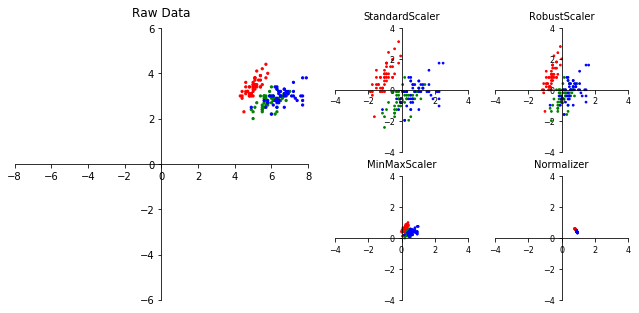

In [22]:
Scaler_Plot(X=iris.loc[:, ["Sepal_Length", "Sepal_Width"]], y=iris["Species"],
            colormap={"Setosa":"Red", "Versicolour":"Green", "Virginica":"Blue"})